<a href="https://colab.research.google.com/github/dbarrau/TensorFlow_training/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03_Classification DNN with Tensorflow

In this notebook we're going to learn how to write neural networks for classification problems. A classification problem is where we try to group one set of features into one or more classes. There are different types of classification:

* Binary
* Multiclass classification
* Multilabel classification

#### What we are going to cover (broadly):

* Architecture of a neural network **classification** model.
* Input shapes and output shapes of a classification model (features and labels)
* Creating custom data to view and fit
* Steps in modeling:
  * Create a model, compile a model, fitting a model, evaluating a model
* Different **classification** evaluation methods
* Saving and loading models

### Architecture of a classification model

hyperparameter | Binary Classification | Multiclass classification
---------------|-----------------------|----------------------------
Input layer shape | Same as number of features | same as binary classification
Hidden layer(s) | Problem speciic, minimum = 1, maximum = unlimited | Same as binary classification
Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification
OUtput layer shape | 1 (one class or the other) | 1 per classs (e.g. 3 for food, person, or dog photo)
Hidden activation | Usually ReLU (rectified linear unit) | Same as binary classification
Output activation | Sigmoid | Softmax
Loss function | Cross entropy (`tf.keras.losses.BinaryCrossentropy` in TensorFlow) | Cross entropy (`tf.keras.losses.CategoricalCrossentropy` in TensorFlow)
Optimizer | SGD (Stochastic gradient descent), Adam | Same as binary classification

> **Source -** Adapted from page 295 of Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow by Aurlélien Géron

### This is how a classification example model looks like (Multiclass classification):

```
# 1. Create model
model = tf.keras.Sequential([
  tf.keras.Input(shape=(224,224,3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(3, activation="softmax")
])

# 2. compile the model
model.compile(
  loss=tf.keras.losses.CategoricalCrossentropy,
  optimizer=tf.keras.optimizers.SGD(),
  metrics=["accuracy"]
)

# 3. fit the model
model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=50)
```



### Creating data to view and fit


In [ ]:
import tensorflow as tf
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

# Make 1000 examples
n_samples = 1000

# Create circles

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.8.2
Running on TPU  ['10.110.71.242:8470']
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.110.71.242:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.110.71.242:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now, so let's visualize it!


In [ ]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0], 
                        "X1":X[:,1], 
                        "label":y
                      })
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


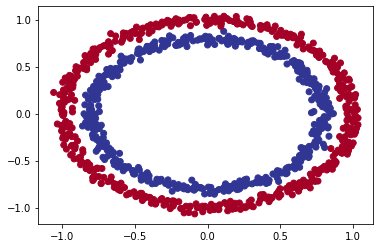

In [ ]:
# Visualie with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [ ]:
# Check the shapes of our features and labels

X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# how many samples we're workingwith
len(X), len(y)

(1000, 1000)

In [ ]:
# first sample
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
# Creating train and test data
tt_split = 0.8
split = tt_split*len(X)

X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

## Steps in modelling


In [ ]:
# 0. Set random seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.Input(shape=(2,)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics="accuracy")

# 3. Fit the model
history = model.fit(X_train,y_train, epochs=200, validation_split=0.2)


Epoch 1/200
20/20 [==============================] - 2s 21ms/step - loss: 0.6880 - accuracy: 0.5203 - val_loss: 0.7093 - val_accuracy: 0.4187
Epoch 2/200
20/20 [==============================] - 0s 12ms/step - loss: 0.6800 - accuracy: 0.5188 - val_loss: 0.7070 - val_accuracy: 0.4187
Epoch 3/200
20/20 [==============================] - 0s 11ms/step - loss: 0.6757 - accuracy: 0.5344 - val_loss: 0.7018 - val_accuracy: 0.4187
Epoch 4/200
20/20 [==============================] - 0s 12ms/step - loss: 0.6688 - accuracy: 0.5188 - val_loss: 0.6955 - val_accuracy: 0.4187
Epoch 5/200
20/20 [==============================] - 0s 11ms/step - loss: 0.6632 - accuracy: 0.5297 - val_loss: 0.6848 - val_accuracy: 0.5500
Epoch 6/200
20/20 [==============================] - 0s 13ms/step - loss: 0.6544 - accuracy: 0.6250 - val_loss: 0.6688 - val_accuracy: 0.5500
Epoch 7/200
20/20 [==============================] - 0s 12ms/step - loss: 0.6390 - accuracy: 0.5797 - val_loss: 0.6541 - val_accuracy: 0.7188
Epoch 

In [ ]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 9ms/step - loss: 0.0042 - accuracy: 1.0000


[0.004197943955659866, 1.0]

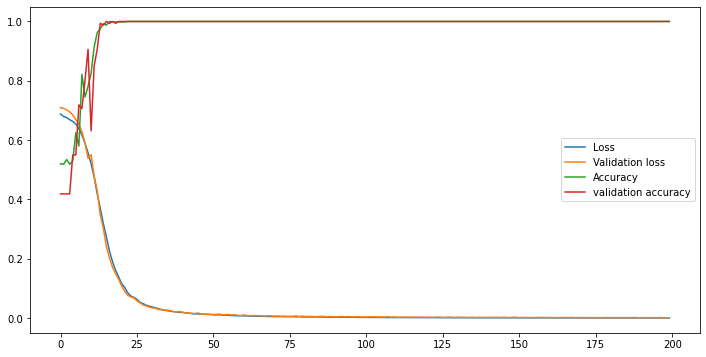

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(history.history["loss"]);
plt.plot(history.history["val_loss"]);

plt.plot(history.history["accuracy"]);
plt.plot(history.history["val_accuracy"]);
plt.legend(["Loss","Validation loss","Accuracy", "validation accuracy"]);

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
plt.figure(figsize=(12,12))
y_test

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0])

<Figure size 864x864 with 0 Axes>

### Let's create another model

In [ ]:
# 0. Set random seed
tf.random.set_seed(42)

# 1. Create model
model_2 = tf.keras.Sequential([
  tf.keras.Input(shape=(2,)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 2. fit the model
history_2 = model_2.fit(X_train, y_train, 
                        epochs=200, 
                        validation_split=0.2, 
                        verbose=0)

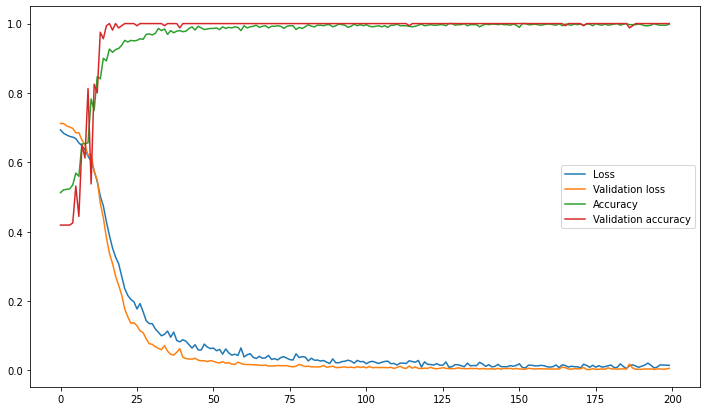

In [ ]:
plt.figure(figsize=(12,7));
plt.plot(history_2.history["loss"]);
plt.plot(history_2.history["val_loss"]);

plt.plot(history_2.history["accuracy"]);
plt.plot(history_2.history["val_accuracy"]);

plt.legend(["Loss", "Validation loss", "Accuracy", "Validation accuracy"]);

## Go back to the first model (as if we do not know yet about activation functions... a bad model)

In [ ]:
# 0. Set the random seed

tf.random.set_seed(42)

# 1. Create model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X_train,y_train, epochs=5, validation_split=0.2)

Epoch 1/5
20/20 [==============================] - 1s 17ms/step - loss: 5.8920 - accuracy: 0.4969 - val_loss: 6.9743 - val_accuracy: 0.4875
Epoch 2/5
20/20 [==============================] - 0s 10ms/step - loss: 5.8059 - accuracy: 0.4672 - val_loss: 7.3789 - val_accuracy: 0.4563
Epoch 3/5
20/20 [==============================] - 0s 11ms/step - loss: 6.2029 - accuracy: 0.5094 - val_loss: 7.4354 - val_accuracy: 0.4563
Epoch 4/5
20/20 [==============================] - 0s 11ms/step - loss: 6.1435 - accuracy: 0.5063 - val_loss: 7.3686 - val_accuracy: 0.4563
Epoch 5/5
20/20 [==============================] - 0s 11ms/step - loss: 6.1328 - accuracy: 0.5063 - val_loss: 7.4515 - val_accuracy: 0.4688


THIS MODEL IS ONLY GUESSING, WHICH COMES FROM NOT USING PROPER ACTIVATION FUNCTIONS AS WE WILL SEE... (FOLLOWING THE COURSE)


In [ ]:
# Let's improve the model by training it for longer
model_1.fit(X_train, y_train, epochs=200, verbose=0)
model_1.evaluate(X_test,y_test)

7/7 [==============================] - 0s 10ms/step - loss: 7.7009 - accuracy: 0.4950


[7.700866222381592, 0.4950000047683716]

NOPE, IT DID NOT WORK

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. fit the model
model_2.fit(X_train, y_train, epochs=100, verbose=0)


In [ ]:
# 4. Evaluate the model
model_2.evaluate(X_test,y_test)

7/7 [==============================] - 0s 8ms/step - loss: 0.6986 - accuracy: 0.4250


[0.6985642910003662, 0.42500001192092896]

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - HYPERPARAMETER TUNING!! (the course goes exploring, but it is the activation function from hidden layers and output layers)
2. Compile
3. Fitting a model

In [ ]:
# Script another model that will not solve the problem (but I will assimilate the commands so good!!)

# 0. Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100, verbose=0);

In [ ]:
# 4. Evaluate model
model_2.evaluate(X_test,y_test)

7/7 [==============================] - 0s 8ms/step - loss: 0.6984 - accuracy: 0.4300


[0.6984356045722961, 0.4300000071525574]

It is not working. Let's plot our predicted data to better understand what it is going on. 

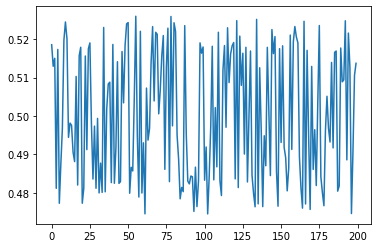

In [ ]:
# test model
predictions = model_2.predict(X_test)
plt.plot(predictions);

We confirmed what we have seen. Predictions oscilate around 0.5 (as white noise).

To visualize our model's predictions let's create a function `plot_decision_boundary()`. This function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls

In [ ]:
# We will plot a function that does the same with our circular toy data
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources.
  1. https://cs231n.github.io/neural-networks-case-study/
  2. https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define axis boundaries of the plot and crate a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (We're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")

    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classification


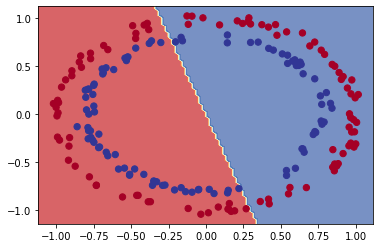

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_2, X=X_test, y=y_test)

In [ ]:
# Let's see if our model can be used for a regression problem...

# set seed
tf.random.set_seed(42)

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = X + 100

# Spit regression data into train and test set
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# model_2.fit(X_reg_train, y_reg_train, epochs=100)

**THE FOLLOWING ERROR OCCURS!!**

```
Epoch 1/100
WARNING:tensorflow:Model was constructed with shape (None, 2) for input KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name='dense_45_input'), name='dense_45_input', description="created by layer 'dense_45_input'"), but it was called on an input with incompatible shape (None,).
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-94-3dcfc054b742> in <module>()
     14 y_reg_test = y_regression[150:]
     15 
---> 16 model_2.fit(X_reg_train, y_reg_train, epochs=100)

1 frames
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/func_graph.py in autograph_handler(*args, **kwargs)
   1145           except Exception as e:  # pylint:disable=broad-except
   1146             if hasattr(e, "ag_error_metadata"):
-> 1147               raise e.ag_error_metadata.to_exception(e)
   1148             else:
   1149               raise

ValueError: in user code:

    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_18" (type Sequential).
    
    Input 0 of layer "dense_45" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None
```


Oh wait... we compiled our model for a binary classification problem

But we're now working on a regression problem. Let's change the model to suit our data


In [ ]:
# shape of X_regression and y_regression
X_reg_train.shape

TensorShape([150])

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# 1. create the model
model_3 = tf.keras.Sequential([
  tf.keras.Input(shape=(1,)),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]
                )

# 3. Fit the model
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 10ms/step - loss: 518.6597 - mae: 518.6597
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 398.6761 - mae: 398.6761
Epoch 3/100
5/5 [==============================] - 0s 13ms/step - loss: 282.7606 - mae: 282.7606
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 162.2864 - mae: 162.2864
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 56.5214 - mae: 56.5214
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 85.4416 - mae: 85.4416
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: 85.3489 - mae: 85.3489
Epoch 8/100
5/5 [==============================] - 0s 10ms/step - loss: 52.1357 - mae: 52.1357
Epoch 9/100
5/5 [==============================] - 0s 9ms/step - loss: 49.5042 - mae: 49.5042
Epoch 10/100
5/5 [==============================] - 0s 9ms/step - loss: 48.3648 - mae: 48.3648
Epoch 11/100
5/5 [===========================

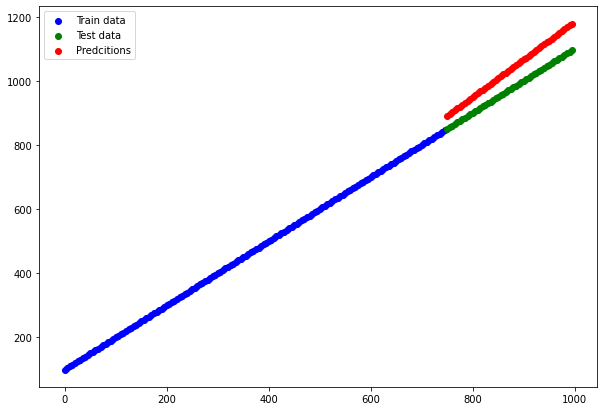

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test);

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train, c="b", label="Train data");
plt.scatter(X_reg_test, y_reg_test, c="g", label= "Test data");
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predcitions");
plt.legend();

### The missing piece: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(2,)),
  tf.keras.layers.Dense(1, activation="linear"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"]
)

# 3. fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 4.2777 - accuracy: 0.4170
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 4.1590 - accuracy: 0.4180
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 4.0185 - accuracy: 0.4370
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 3.9063 - accuracy: 0.4390
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 3.7586 - accuracy: 0.4390
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 3.6679 - accuracy: 0.4380
Epoch 7/100
32/32 [==============================] - 0s 8ms/step - loss: 3.3996 - accuracy: 0.4390
Epoch 8/100
32/32 [==============================] - 0s 8ms/step - loss: 2.9749 - accuracy: 0.4310
Epoch 9/100
32/32 [==============================] - 0s 8ms/step - loss: 2.6049 - accuracy: 0.4260
Epoch 10/100
32/32 [==============================] - 0s 8ms/step - loss: 2.3589 - accuracy: 0.4230
Epoch 11/

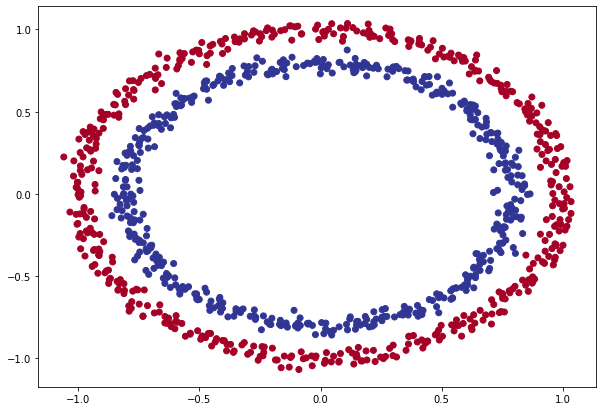

In [ ]:
# Check out our data
plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

doing binary classification


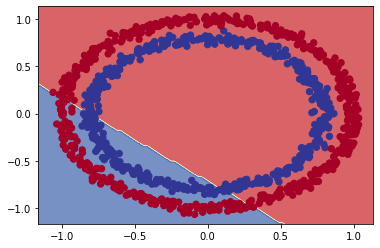

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,X=X,y=y)

Let's try build a neural network with a non-linear activation function

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_5.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 4.2910 - accuracy: 0.4190
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 4.2355 - accuracy: 0.4100
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 4.2296 - accuracy: 0.4100
Epoch 4/100
32/32 [==============================] - 0s 9ms/step - loss: 4.1957 - accuracy: 0.4150
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 4.1648 - accuracy: 0.4140
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 4.1596 - accuracy: 0.4130
Epoch 7/100
32/32 [==============================] - 0s 9ms/step - loss: 4.1458 - accuracy: 0.4130
Epoch 8/100
32/32 [==============================] - 0s 8ms/step - loss: 4.1405 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 8ms/step - loss: 4.1367 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 8ms/step - loss: 4.1233 - accuracy: 0.4200
Epoch 11/

In [ ]:
# Time to replicate the multi-layer neural network from TensorFlow Playground

# 0. set random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"]
)

# 3. fit model
model_6.fit(X,y, epochs=250)
                

Epoch 1/250
32/32 [==============================] - 1s 8ms/step - loss: 1.2347 - accuracy: 0.4220
Epoch 2/250
32/32 [==============================] - 0s 9ms/step - loss: 0.9105 - accuracy: 0.4170
Epoch 3/250
32/32 [==============================] - 0s 9ms/step - loss: 0.8470 - accuracy: 0.3650
Epoch 4/250
32/32 [==============================] - 0s 8ms/step - loss: 0.8196 - accuracy: 0.3330
Epoch 5/250
32/32 [==============================] - 0s 8ms/step - loss: 0.8035 - accuracy: 0.3230
Epoch 6/250
32/32 [==============================] - 0s 8ms/step - loss: 0.7930 - accuracy: 0.2970
Epoch 7/250
32/32 [==============================] - 0s 8ms/step - loss: 0.7855 - accuracy: 0.3140
Epoch 8/250
32/32 [==============================] - 0s 8ms/step - loss: 0.7795 - accuracy: 0.3140
Epoch 9/250
32/32 [==============================] - 0s 8ms/step - loss: 0.7750 - accuracy: 0.3120
Epoch 10/250
32/32 [==============================] - 0s 8ms/step - loss: 0.7713 - accuracy: 0.3030
Epoch 11/

In [ ]:
# Evaluate model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 8ms/step - loss: 0.0242 - accuracy: 0.9970


[0.024177338927984238, 0.996999979019165]

doing binary classification


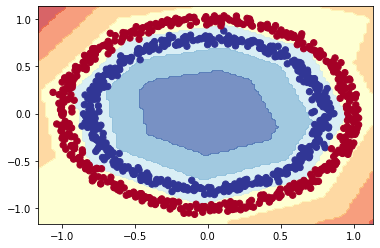

In [ ]:
# How do our model predictions look
plot_decision_boundary(model_6,X,y)

In [ ]:
# 0. Set random seed
tf.random.set_seed(42)

# 1. Create model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.6941 - accuracy: 0.4930
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6920 - accuracy: 0.5060
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6905 - accuracy: 0.5090
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6865 - accuracy: 0.5430
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6781 - accuracy: 0.5160
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6655 - accuracy: 0.5940
Epoch 7/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6451 - accuracy: 0.6130
Epoch 8/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6011 - accuracy: 0.6660
Epoch 9/100
32/32 [==============================] - 0s 8ms/step - loss: 0.5508 - accuracy: 0.7410
Epoch 10/100
32/32 [==============================] - 0s 8ms/step - loss: 0.4398 - accuracy: 0.9350
Epoch 11/

In [ ]:
# 4. Evaluate model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 7ms/step - loss: 0.0090 - accuracy: 0.9970


[0.008991952985525131, 0.996999979019165]

doing binary classification


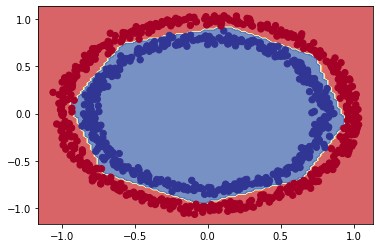

In [ ]:
# visualize
plot_decision_boundary(model_7,X,y)

> **Note -**The combination of linearity given by the matrix operations, plus the non-linearity providen by activation functions that are non linear such as ReLu, Sigmoid, Softmax, Tanh and more comprise one of the key benefits of neural networks.

Now that we've discussed the concept of linear and non-linear functions (or lines), let's see them in action

In [ ]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

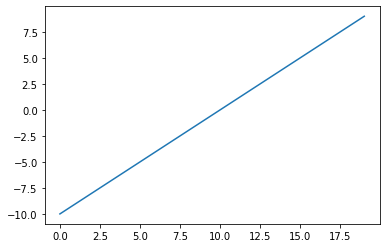

In [ ]:
# Visualize our tensor
plt.plot(A);

In [ ]:
# Let's start by replicating sigmoid -sigmoid(x) = 1/1 (1+exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

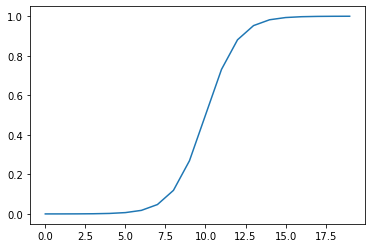

In [ ]:
plt.plot(sigmoid(A));


In [ ]:
# Let's recreate relu activation function

def relu(x):
  return tf.maximum(0,x)


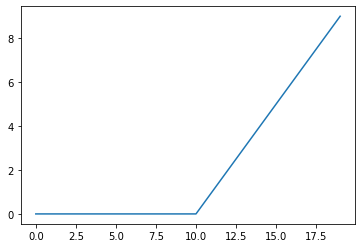

In [ ]:
# Plot relu
plt.plot(relu(A));

In [ ]:
# Let's try linear activation function


### Evaluating and improving our model

We've committed a sin in ML. We have been using the same data to evaluate the model and to train the model.

In [ ]:
len(X)

1000

In [ ]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:] 

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# 0. Set random seed
tf.random.set_seed(42)

# 1.Create the model (lucky model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train,y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 8ms/step - loss: 0.6948 - accuracy: 0.4787
Epoch 2/25
25/25 [==============================] - 0s 9ms/step - loss: 0.6888 - accuracy: 0.5075
Epoch 3/25
25/25 [==============================] - 0s 8ms/step - loss: 0.6844 - accuracy: 0.5325
Epoch 4/25
25/25 [==============================] - 0s 8ms/step - loss: 0.6815 - accuracy: 0.5425
Epoch 5/25
25/25 [==============================] - 0s 8ms/step - loss: 0.6780 - accuracy: 0.5663
Epoch 6/25
25/25 [==============================] - 0s 8ms/step - loss: 0.6731 - accuracy: 0.5587
Epoch 7/25
25/25 [==============================] - 0s 8ms/step - loss: 0.6663 - accuracy: 0.5763
Epoch 8/25
25/25 [==============================] - 0s 8ms/step - loss: 0.6607 - accuracy: 0.5775
Epoch 9/25
25/25 [==============================] - 0s 8ms/step - loss: 0.6500 - accuracy: 0.6587
Epoch 10/25
25/25 [==============================] - 0s 8ms/step - loss: 0.6373 - accuracy: 0.6062
Epoch 11/25
25/25 [

In [ ]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 9ms/step - loss: 0.3703 - accuracy: 0.8800


[0.3702657222747803, 0.8799999952316284]

doing binary classification
doing binary classification


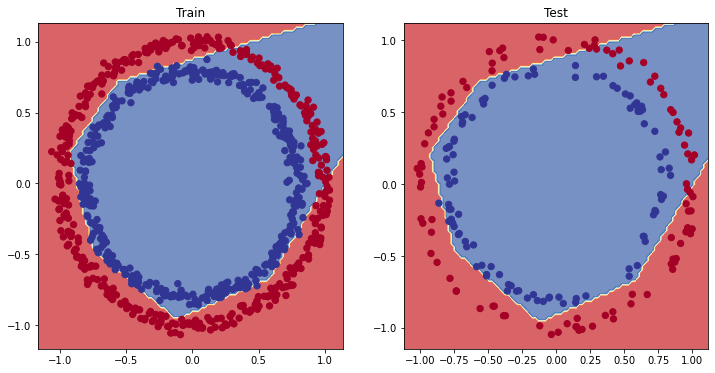

In [ ]:
# Plot the decision boundaries for training and test sets

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.title("Train");

plt.subplot(1,2,2)
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.title("Test");


### Plot the loss (or training) curve

In [ ]:
# Convert the history object into a dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.694811,0.47875
1,0.688768,0.50750
2,0.684434,0.53250
3,0.681456,0.54250
4,0.677980,0.56625
5,0.673062,0.55875
6,0.666336,0.57625
7,0.660652,0.57750
8,0.650041,0.65875
9,0.637340,0.60625


Text(0.5, 1.0, 'Model_8 loss curve')

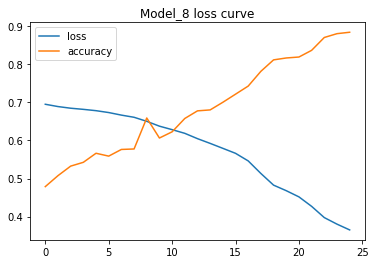

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curve")

> **Note -** For many problems, the loss function going down means the model is improving (the predictions it's making is getting ground true levels)

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:

* A learning rate **callback** - You can think of a callback as an extra piece of functionality while the model is training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

NameError: ignored

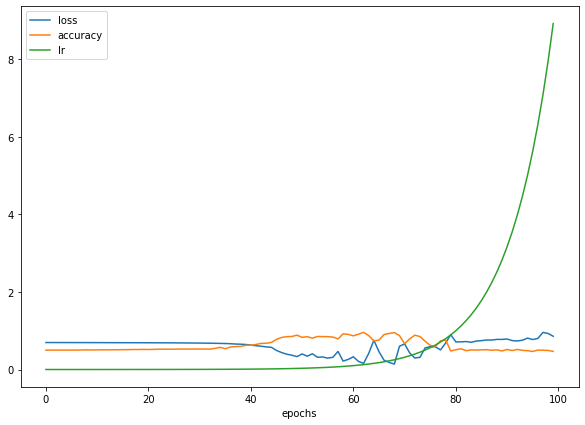

In [ ]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

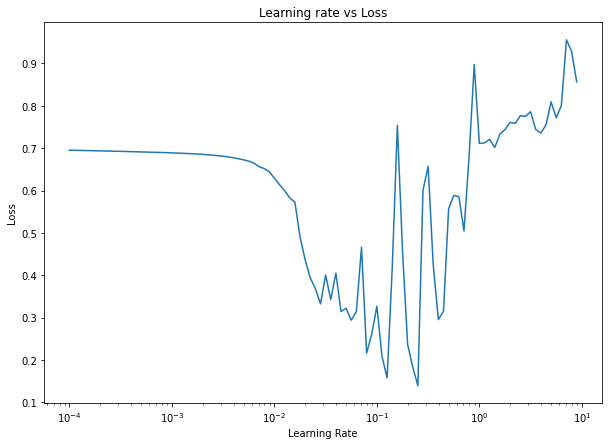

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [ ]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Let's try using a higher *ideal* learning rate with the same model as before

# 0. Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# 3. Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train,y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 8ms/step - loss: 0.6934 - accuracy: 0.4837
Epoch 2/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6831 - accuracy: 0.5813
Epoch 3/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6716 - accuracy: 0.5688
Epoch 4/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6567 - accuracy: 0.5975
Epoch 5/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6460 - accuracy: 0.6513
Epoch 6/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6230 - accuracy: 0.6363
Epoch 7/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6038 - accuracy: 0.6650
Epoch 8/20
25/25 [==============================] - 0s 9ms/step - loss: 0.5943 - accuracy: 0.6650
Epoch 9/20
25/25 [==============================] - 0s 8ms/step - loss: 0.5788 - accuracy: 0.6762
Epoch 10/20
25/25 [==============================] - 0s 8ms/step - loss: 0.5510 - accuracy: 0.6888
Epoch 11/20
25/25 [

In [ ]:
# 4. Evaluate model 10 on test dataset
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 8ms/step - loss: 0.2908 - accuracy: 0.8400


[0.2907995581626892, 0.8399999737739563]

In [ ]:
# Evaluate model 8 on test data
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 10ms/step - loss: 0.3703 - accuracy: 0.8800


[0.3702657222747803, 0.8799999952316284]

Model 10 gets a lower loss value, but `model_8` gets a higher accuracy value. This is important to look at. The metrics we get from the training set are always as important as the ones we get from the testing set. Just because `model_10` learned faster, it does not mean that it will perform better on unseen data.

doing binary classification
doing binary classification


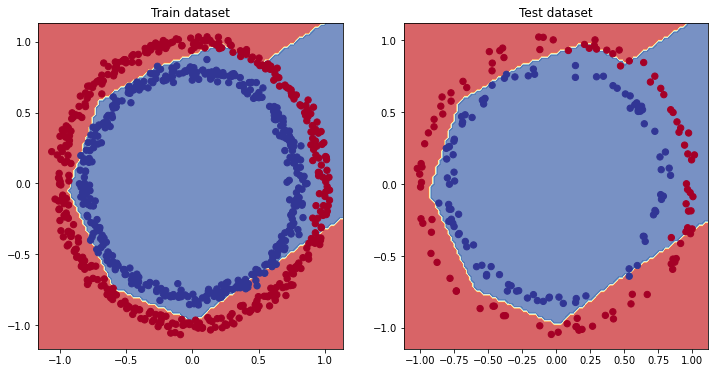

In [ ]:
# Plot the decision boundaries for training and test set

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model_10,X_train,y_train)
plt.title("Train dataset");

plt.subplot(1,2,2)
plot_decision_boundary(model_10,X_test,y_test)
plt.title("Test dataset");

### Classification evaluation methods

Metric Name | Metric Formula | Code | When to use
------------|----------------|------|-----------------------------
Accuracy    | `Accuracy = (tp + tn)/(tp + tn + fp + fn)`| `tf.keras.metrics.Accuracy()` or <br /> `sklearn.metrics.accuracy_score()`|  Default metric for classification problems. <br />Not the best for imbalanced classes.
Precision | `Precision = tp/(tp + tn)`| `tf.keras.metrics.precision()` or <br />`sklearn.metrics.precision_score()` | Higher precision leads to less false positives.
Recall | `Recall = tp/(tp + fn)` | `tf.keras.metrics.Recall()` or <br /> `sklearn.metrics.recall_score()`| Higher recall leads to less false negatives.
F1-score | `F1-score = 2*precision*recall/(precision + recall)` | `sklearn.metrics.f1_score()` | Combination of precision and recall,<br /> usually a good overall metric for a<br /> classification model. 
Confusion Matrix | NA | `custom function` or <br />`sklearn.metrics.confusion_matrix()` | When comparing predictions to truth labels <br /> to see where the model gets confused. <br /> Can be hard to use with large number of classes.

**Key:** tp = True Positive | tn = True Negative | fp = False Positive | fn = False Negative

**Notes on metrics -**
* Going for Accuracy score is good for balanced datasets (fair number from each category)
* Precision and recall amounts to minimize false positives and false negatives, respectively. 


  Imagine a test output shows I do not have Corona Virus, when I actually have it. Going around doing my life as normal would be bad since I would be spreading the virus. In such cases, recall would be a more sensitive use case, as well as Precision, as together they would minimize false predictions alltogther (false positives and false negatives)

**Let's see both of them together**

Unfortunately we can't have both precision and recall high. If we increase precision, it will reduce recall, and vice versa. This is called the **precision/recall tradeoff**

> Originally we want our model output to have a high recall and precision. But as soon as we want to increase one, the other decreases.




## More classification evaluation methods

Alognside visualizing our models as much as possible, there are a handful of other evaluation methods and metrics we should be familiar with:
* Accuracy
* Precision
* Recall
* Confusion Matrix
* F1-score
* Classification report (from scikit-learn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html


In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test,y_test)
print(f"model loss on the test set: {loss}")
print(f"model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 8ms/step - loss: 0.2908 - accuracy: 0.8400
model loss on the test set: 0.2907995581626892
model accuracy on the test set: 84.00%


How about a confusion matrix?


true_labels / </br> pred labels   | prediction label 0 | prediction label 1
--------------|----------|--------------
**True labels 0**|  `tn`   |   `fp`
**True labels 1** | `fn` | `tp`

Just for the memory and consolidating stuff:
* True positive = model predicts 1, truth is 1
* True negative = model predicts 0, truth is 0
* False positive = model predicts 1, truth is 0
* False negative = model predicts 0, truth is 1

In [ ]:
from sklearn.metrics import confusion_matrix

# Make some predictions
y_preds = model_10.predict(X_test)

# Create a confusion matrix
# confusion_matrix(y_test, y_preds)

We get this error:

```
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-134-d24972be3108> in <module>()
      5 
      6 # Create a confusion matrix
----> 7 confusion_matrix(y_test, y_preds)

1 frames
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py in _check_targets(y_true, y_pred)
     93         raise ValueError(
     94             "Classification metrics can't handle a mix of {0} and {1} targets".format(
---> 95                 type_true, type_pred
     96             )
     97         )

ValueError: Classification metrics can't handle a mix of binary and continuous targets
```

Oops.. our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions.

In [ ]:
# Convert prediction probabilities to binary format and view the first 10 
y_test[:10], y_preds[:10]

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]), array([[0.526181  ],
        [0.7010685 ],
        [0.7275898 ],
        [0.94621813],
        [0.5809915 ],
        [0.00207889],
        [0.978912  ],
        [0.00118703],
        [0.526181  ],
        [0.526181  ]], dtype=float32))

In [ ]:
y_preds = tf.round(y_preds)

In [ ]:
# Create a confusion matrix


How about we present the confusion matrix in a more neat way


In [ ]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot of confusion_matrix plot
# Source: https://github.com/scikit-learn/scikit-learn/blob/80598905e/sklearn/metrics/_plot/confusion_matrix.py#L462

import itertools

def plot_confusion_matrix(y_true,y_pred, classes=None, figsize=(10,10),text_size=15):

  y_pred = tf.round(y_preds)
  y_true = tf.cast(y_true, dtype=tf.float32)

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]
  n_classes

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # We want the diagonal axis in confusion matrices normally to be darker than 
  # false values. 

  # Plot the text on each cell

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)



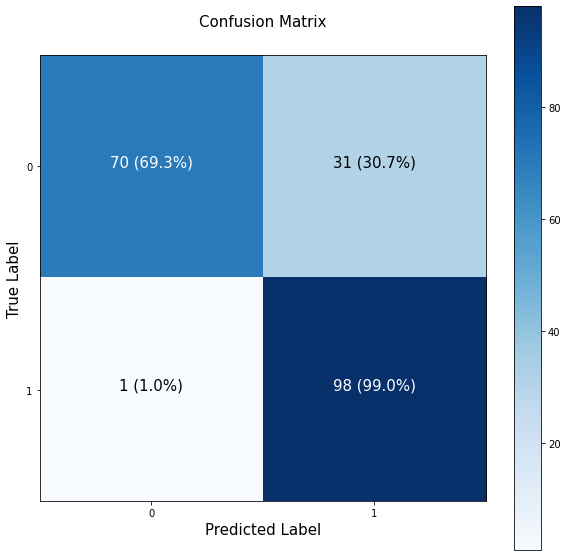

In [ ]:
plot_confusion_matrix(y_test,y_preds)

# Working with a larger example (Multiclass classification)

When we have more than two classes as an option, it is known as **multi-class classification**.

* This means if we have 3 diferent classes, it's multi-class classification.
* It also means if we have 100 different classes, it's multi-class classification

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing. 

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# show the first training example
print(f"Training sample: \n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

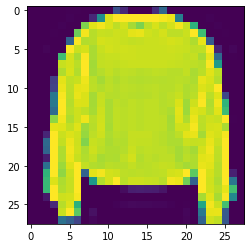

In [ ]:
# Plot a single sample
plt.imshow(train_data[7]);

In [ ]:
# Check out sample label
train_labels[7]

2

In [ ]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
len(class_names)

10

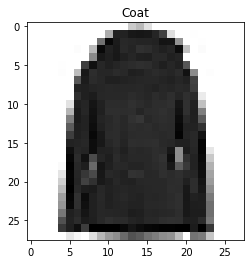

In [ ]:
# Plot an exmaple image and its label
index_of_choice = 2000

plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]]);

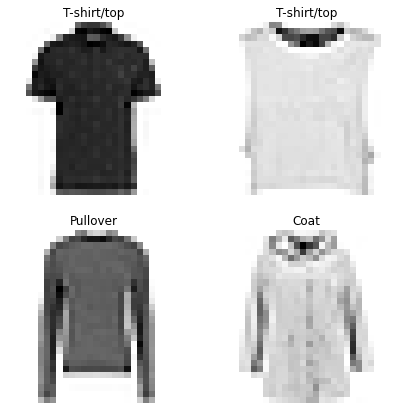

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)


## Building a multi-class classification model

For our multi-class classification model we can use a similar architecture to our binary classifiers, however we are going to have to tweak a few things.

Input shape:

In [ ]:
train_data[0].shape

(28, 28)

Output shape:

In [ ]:
len(class_names)

10

So we have:
* Input shape = 28 x 28 (the shape of each image)
* Output shape = 10 (one per class of clothing)
* Loss function = `tf.keras.losses.CategoricalCrossentropy()`
* Output layer activation = Softmax (not sigmoid)

> **Important note -** In multi-class classification, when our labels are expressed in Integer form, we employ `tf.keras.losses.SparseCategoricalCrossentropy()`. Otherwise it categorical cross-entropy is used, `tf.keras.losses.CategoricalCrossentropy()` requires a **one-hot encoded** version of the labels.

In [ ]:
# See what tf.keras.layers.Flatten() does
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
print(flatten_model.output_shape)

(None, 784)


In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
# 0. Set random seed
tf.random.set_seed(42)

# 1. Create model
model_11 = tf.keras.Sequential([
  # Our data needs to be flattened (normal preprocessing in image processing)
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. Fit the model
non_norm_history = model_11.fit(train_data, 
                                train_labels, 
                                epochs=10, 
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 2.1462 - accuracy: 0.1933 - val_loss: 1.7737 - val_accuracy: 0.2947
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 1.6980 - accuracy: 0.3110 - val_loss: 1.5896 - val_accuracy: 0.3407
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 1.5619 - accuracy: 0.3432 - val_loss: 1.6037 - val_accuracy: 0.3316
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.4618 - accuracy: 0.3762 - val_loss: 1.4425 - val_accuracy: 0.3724
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.4282 - accuracy: 0.3870 - val_loss: 1.5691 - val_accuracy: 0.3536
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.3504 - accuracy: 0.4170 - val_loss: 1.3533 - val_accuracy: 0.4248
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.3214 - accuracy: 0.4300 - val_loss: 1.2974 - val_ac

In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer dta to be scaled (or normalized). This means they like to have the numbers in tensors they find patterns in, between 0 and 1.

In [ ]:
# We can get our training and teseting data between 0 and 1 b dividing by the maxium
train_data_norm = train_data /255.0
test_data_norm = test_data/255.0

# check min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

## Let's model again...

In [ ]:
# 0. Set random seed
tf.random.set_seed(42)

# 1. Create model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(len(class_names), activation="softmax")
])

# 2. Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_12.fit(train_data_norm,
                               train_labels, 
                               epochs=10,
                               validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 1.4758 - accuracy: 0.4347 - val_loss: 1.1848 - val_accuracy: 0.5482
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.0715 - accuracy: 0.5810 - val_loss: 1.0027 - val_accuracy: 0.6068
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.9263 - accuracy: 0.6309 - val_loss: 0.8813 - val_accuracy: 0.6420
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.8316 - accuracy: 0.6472 - val_loss: 0.8252 - val_accuracy: 0.6488
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.7715 - accuracy: 0.6956 - val_loss: 0.7476 - val_accuracy: 0.7300
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.6878 - accuracy: 0.7579 - val_loss: 0.6840 - val_accuracy: 0.7614
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.6364 - accuracy: 0.7779 - val_loss: 0.6492 - val_ac

>**Note -** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 and 1)

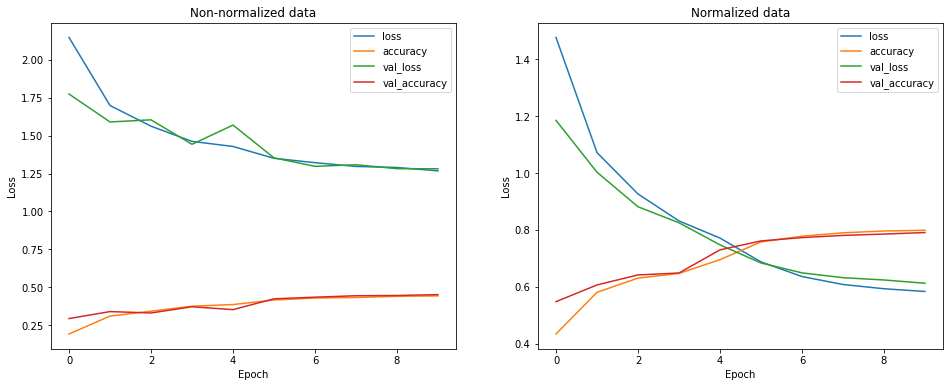

In [ ]:
# Create figure for subplots
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(16,6));

# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(ax=ax1, 
                                            title="Non-normalized data", 
                                            ylabel="Loss",
                                            xlabel="Epoch");

# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(ax=ax2, 
                                        title="Normalized data", 
                                        ylabel="Loss",
                                        xlabel="Epoch");


> **Note -** The same model with slightly different data can produce dramatically different results. So when we are comparing models, it is important to make sure we compare them on the same criteria (e.g. same architechture, different data. change one thing at a time)

## Finding the ideal learning rate

In [ ]:
# 0. Set random seed
tf.random.set_seed(42)

# 1. Create model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(len(class_names), activation="softmax")
])

# 2. compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm,test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 17s 9ms/step - loss: 1.1922 - accuracy: 0.5789 - val_loss: 0.8575 - val_accuracy: 0.7162 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 16s 9ms/step - loss: 0.7588 - accuracy: 0.7437 - val_loss: 0.7346 - val_accuracy: 0.7599 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 16s 9ms/step - loss: 0.6790 - accuracy: 0.7693 - val_loss: 0.6960 - val_accuracy: 0.7628 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 16s 9ms/step - loss: 0.6492 - accuracy: 0.7765 - val_loss: 0.6681 - val_accuracy: 0.7797 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 16s 9ms/step - loss: 0.6351 - accuracy: 0.7799 - val_loss: 0.6716 - val_accuracy: 0.7744 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 16s 9ms/step - loss: 0.6255 - accuracy: 0.7835 - val_loss: 0.6683 - val_accuracy: 0.7771 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================

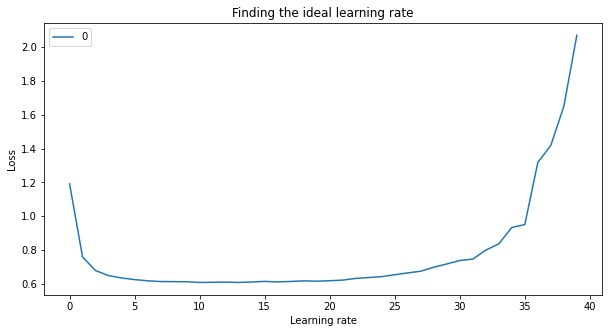

In [ ]:
# Plot the learning rate decay curve
pd.DataFrame(find_lr_history.history["loss"]).plot(title="Finding the ideal learning rate",
                                                   ylabel="Loss",
                                                   xlabel="Learning rate",
                                                   figsize=(10,5));


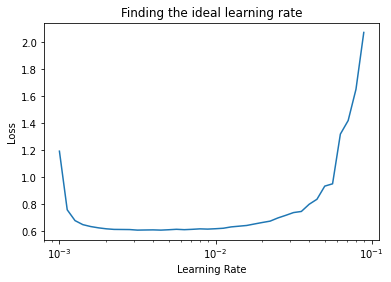

In [ ]:
lrs = 1e-3 * 10**(tf.range(40)/20)

plt.semilogx(lrs, find_lr_history.history["loss"]);
plt.ylabel("Loss");
plt.xlabel("Learning Rate");
plt.title("Finding the ideal learning rate");

In [ ]:
# For completeness let's fit a model with ideal learning rate

# 0. Set random seed
tf.random.set_seed(42)

# 1. Create model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

history_14 = model_14.fit(train_data_norm,
                      train_labels,
                      epochs=20,
                      validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 16s 8ms/step - loss: 1.1300 - accuracy: 0.5608 - val_loss: 0.7110 - val_accuracy: 0.7443
Epoch 2/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.6448 - accuracy: 0.7680 - val_loss: 0.6527 - val_accuracy: 0.7679
Epoch 3/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.6006 - accuracy: 0.7836 - val_loss: 0.6289 - val_accuracy: 0.7717
Epoch 4/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5763 - accuracy: 0.7969 - val_loss: 0.5930 - val_accuracy: 0.7929
Epoch 5/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5596 - accuracy: 0.8045 - val_loss: 0.5885 - val_accuracy: 0.7965
Epoch 6/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5466 - accuracy: 0.8083 - val_loss: 0.5969 - val_accuracy: 0.7931
Epoch 7/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5389 - accuracy: 0.8123 - val_loss: 0.5950 - val_ac

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Asses some of its predictions (through visualization)
* Improve its results (by training it for longer, or changing the architecture)
* Save an export it for use in an application

Let's go throug hthe top 2

In [ ]:
# Create a confusion matrix
y_probs = model_14.predict(test_data_norm)

In [ ]:
y_probs.shape, test_labels.shape

((10000, 10), (10000,))

In [ ]:
y_probs[:5]

array([[8.11315957e-08, 1.93838823e-05, 1.78699690e-06, 3.75519721e-06,
        1.34783343e-03, 1.18813269e-01, 5.07099576e-05, 2.19168589e-01,
        4.11284454e-02, 6.19466126e-01],
       [2.04726850e-04, 2.96029734e-09, 8.73892009e-01, 1.40676690e-07,
        4.35247496e-02, 3.84994261e-30, 8.23609009e-02, 1.68152839e-25,
        1.75276473e-05, 6.86019528e-17],
       [2.13709745e-06, 9.96332884e-01, 3.78406621e-05, 3.24751902e-03,
        2.80188426e-04, 1.06327208e-12, 4.49797108e-06, 3.69427426e-06,
        4.04890843e-10, 9.10803501e-05],
       [3.32637118e-09, 9.99541759e-01, 4.51586217e-08, 2.93780206e-04,
        2.71475119e-06, 3.30375816e-14, 4.94511765e-09, 6.75155661e-06,
        8.42661580e-14, 1.55035435e-04],
       [1.23506382e-01, 3.29571230e-05, 1.01499766e-01, 1.28052821e-02,
        7.10863769e-02, 2.81235860e-14, 6.86613023e-01, 1.81003453e-14,
        4.45610564e-03, 2.45974654e-08]], dtype=float32)

>**Note -** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data)

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.1131596e-08, 1.9383882e-05, 1.7869969e-06, 3.7551972e-06,
        1.3478334e-03, 1.1881327e-01, 5.0709958e-05, 2.1916859e-01,
        4.1128445e-02, 6.1946613e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Convert all of prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [ ]:
y_preds.shape, test_labels.shape

((10000,), (10000,))

In [ ]:
confusion_matrix(y_true=test_labels,y_pred=y_preds)

array([[736,   3,  18,  76,   5,   5, 145,   0,  11,   1],
       [  1, 948,  12,  32,   5,   0,   1,   0,   1,   0],
       [ 19,   7, 692,  13, 140,   0, 125,   0,   4,   0],
       [ 54,  22,   8, 795,  44,   1,  71,   1,   4,   0],
       [  1,   3, 122,  20, 748,   0,  97,   0,   9,   0],
       [  0,   1,   0,   2,   0, 876,   0,  78,  11,  32],
       [138,   5, 112,  47, 120,   2, 559,   0,  16,   1],
       [  0,   0,   0,   0,   1,  31,   0, 945,   1,  22],
       [  3,   1,   4,  10,   9,   4,  38,   6, 925,   0],
       [  0,   0,   0,   0,   2,  18,   0,  60,   4, 916]])

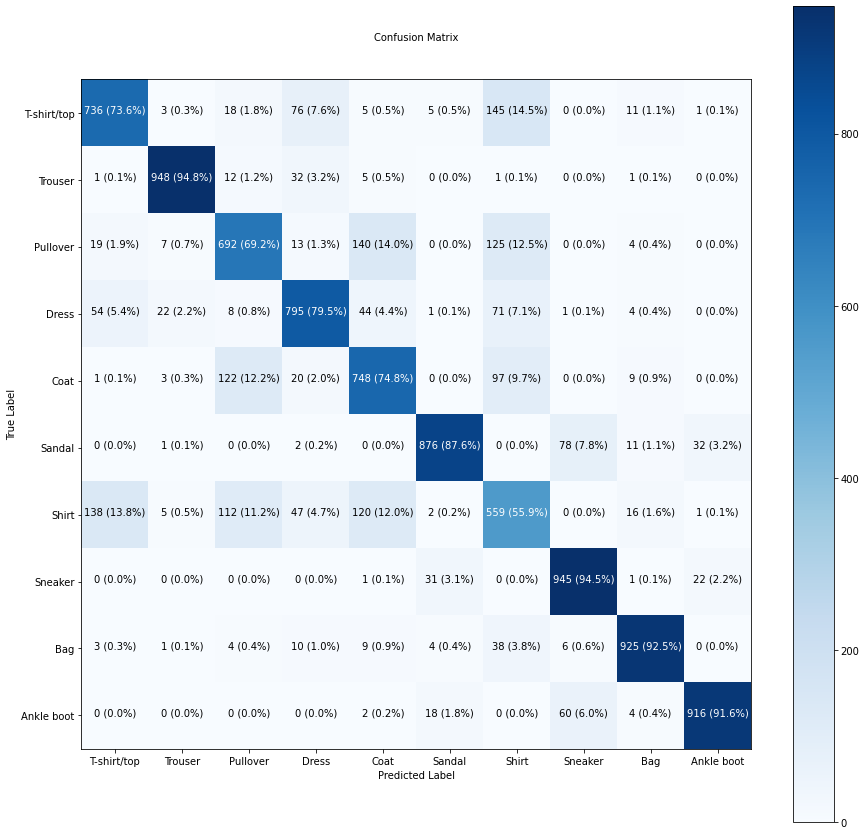

In [ ]:
# Make a prettier confusion matrix
plot_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds, 
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10
                      )

> **Note -** Often when working with image and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth lbel & the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plot the image
plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the predictions is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # SEt the color to green or red based on if prediction is right or wrong

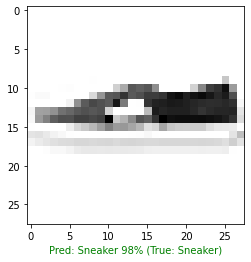

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm, # always make predictions on same test data it was used for trianing (when it is normalized, for example)
                  true_labels=test_labels,
                  classes=class_names)

# What patterns is our model learning?

Remember neural network learn patterns thorugh updating weights and biases guided by the loss function, optimizers, activation functions and other hyperparameters. 

As we see in the dense layer:

```
tf.keras.layers.Dense(
  units,
  activation=None,
  use_bias=True,
  kernel_initializer="glorot_uniform",
  bias_initializer="zeros",
  kernel_regularizer=None
  bias_regularizer=None,
  activity_regularizer=None,
  kernel_constraint=None,
  bias_constraint=None, 
  **Kwargs
)
```
* Weights are initialized in `kernel_initializer`, and glorot is usually the best
* Biases are initialized by default through `zeros`


In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.6306871 ,  0.5858232 ,  0.47122943, -0.75160426],
        [-0.5544151 ,  0.17945388,  0.07654241, -0.22292812],
        [-0.71867406,  0.29797414,  0.89871246, -0.6738789 ],
        ...,
        [ 0.1609848 , -0.94983643, -0.10022577, -0.53114027],
        [ 0.7268489 , -0.34758607, -0.31151012, -0.26678506],
        [-0.44531196,  0.16330332,  0.76045156, -0.24484757]],
       dtype=float32), (784, 4))

In [ ]:
model_14.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_42 (Dense)            (None, 4)                 3140      
                                                                 
 dense_43 (Dense)            (None, 4)                 20        
                                                                 
 dense_44 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now let's checkout the bias vector


In [ ]:
# Bias and biases shapes
biases, biases.shape

(array([-0.44647247,  0.9127456 ,  0.08350187,  0.45829162], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector gets initialized by `zeros` as standard (at least in the case of a TensorFlow dense layer).

The bias vector dictates how much the patterns within the correspnding weights matrix should influence the next layer

In [ ]:
model_14.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_42 (Dense)            (None, 4)                 3140      
                                                                 
 dense_43 (Dense)            (None, 4)                 20        
                                                                 
 dense_44 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


1.3.0


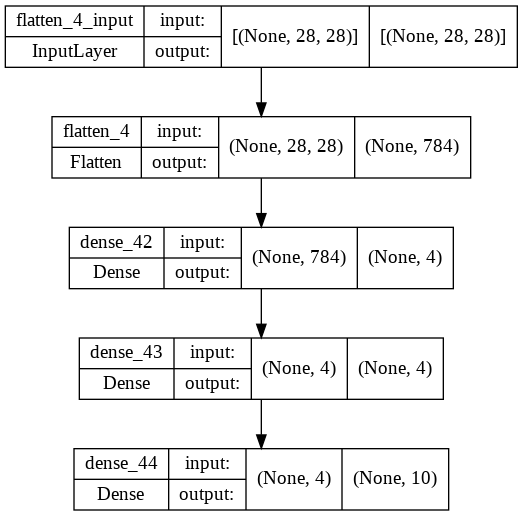

In [ ]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
import pydot
print(pydot.__version__)

# See the inputs and outputs of each layer
plot_model(model_14,show_shapes=True)

### Exctracurricular activities

> **Notes on video -** Source: https://www.youtube.com/watch?v=IHZwWFHWa-w
